# 06wk-025: 취업+각종영어점수, Lasso

최규빈  
2023-10-05

# 1. 강의영상

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.linear_model

# 3. Data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [3]:
df

# 4. True (Oracle)

In [4]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 

In [9]:
print(f'train_score:\t{predictr.score(X,y):.4f}')
print(f'test_score:\t{predictr.score(XX,yy):.4f}')


train_score:    0.9133
test_score: 0.9127

# 5. Baseline

`-` 모든 변수를 활용하여 회귀모형으로 적합 $\to$ 최악의 결과

In [10]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 


`-` 평가

In [11]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     1.0000
test_score:  0.1171

# 6. Lasso

`-` Lasso를 이용

In [12]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Lasso()
## step3
predictr.fit(X,y)
## step4 : pass 


/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.877e+01, tolerance: 3.337e-01
  model = cd_fast.enet_coordinate_descent(

`-` 평가

In [13]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     0.8600
test_score:  0.8306

# 7. Lasso는 왜 결과를 좋게 만들까?

## A. 정확한 설명

`-` 어려워요..

## B. 직관적 설명 (엄밀하지 않은 설명)

`-` 느낌: 몇 개의 toeic coef들로 쉽게 0.01을 만들게 해서는 안된다.

-   아이디어1: 0.01을 엔빵한다. – Ridge, L2-panalty
-   아이디어2: 아주 적은 coef만을 살려두고 나머지 coef값은 0으로
    강제한다. – Lasso, L1-panalty

`-` 계수값이 0이라는 의미: 그 변수를 제거한것과 같은 효과

`-` 아이디어2의 기원: `y ~ toeic + gpa` 가 트루이지만,
`y ~ toeic0 + gpa` 으로 적합해도 괜찮잖아?

`-` 진짜 학습된 계수값이 대부분 0인지 확인해보자.

In [15]:
predictr.coef_

## C. $\alpha$ 에 따른 변화 관찰

`-` 여러개의 predictor 학습

In [48]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
# step2: 여러개의 predictor 생성 
alphas = np.linspace(0,1,100)
predictrs = [sklearn.linear_model.Lasso(alpha=alpha) for alpha in alphas]
# step3: fit 
for predictr in predictrs:
    predictr.fit(X,y)

/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/cgb2/anaconda3/envs/ag/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.510e+01, tolerance: 3.337e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/Ridg

`-` 계수값 시각화

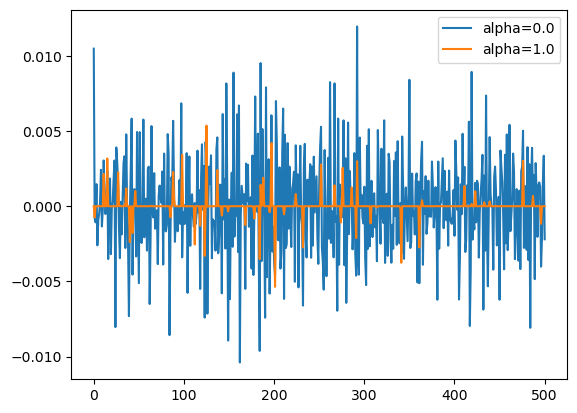

In [50]:
plt.plot(predictrs[0].coef_.reshape(-1)[1:],label=f'alpha={predictrs[0].alpha}')
plt.plot(predictrs[-1].coef_.reshape(-1)[1:],label=f'alpha={predictrs[-1].alpha}')
plt.legend()

In [56]:
predictrs[-1].coef_[1:].sum()

`-` number of non-zero coefs 를 시각화

In [58]:
nonzero_coefs = [abs(predictr.coef_>0).sum() for predictr in predictrs] 

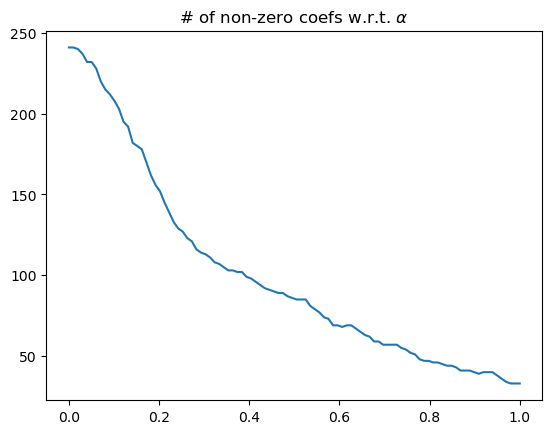

In [62]:
plt.plot(alphas,nonzero_coefs)
plt.title(r'# of non-zero coefs w.r.t. $\alpha$')

## D. coef를 0으로 만드는 수학적 장치

`-` Ridge(복습): coef의 값들을 엔빵하는 수학적 장치

-   패널티: 유사토익들의 계수값을 제곱한뒤 합치고(=L2-norm을 구하고), 그
    값이 0에서 떨어져 있을 수록 패널티를 줄꺼야!

`-` Lasso: coef의 값들을 대부분 0으로 만드는 수학적 장치

-   패널티: 유사토익들의 계수값의 절대값을 구한뒤에 합치고(=L1-norm을
    구하고), 그 값이 0에서 떨어져 있을 수록 패널티를 줄꺼야!

`-` 사실 L1, L2 패널티에 따라서 이러한 결과가 나오는 것은 이해하기
어렵다. (그래서 취업/대학원 진학시 단골질문중 하나)

`-` alpha에 따른 L1-panalty값을 시각화

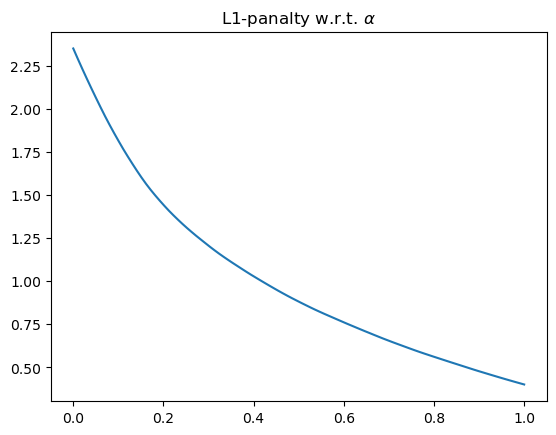

In [73]:
l1_panalties = [abs(predictr.coef_).sum() for predictr in predictrs] 
plt.plot(alphas,l1_panalties)
plt.title(r"L1-panalty w.r.t. $\alpha$")